<a href="https://colab.research.google.com/github/prabhhav/JupyterNotebooks/blob/main/PrabhhavTF_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pylab as plt

In [ ]:
CLASSIFIER_URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2" 

In [ ]:
IMAGE_RES = 224 

In [ ]:
model = tf.keras.Sequential([
        hub.KerasLayer(CLASSIFIER_URL, input_shape=(IMAGE_RES, IMAGE_RES, 3)), 
        tf.keras.layers.Dense(2, activation='softmax') 
]) 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy', metrics='accuracy') 


In [ ]:
EPOCHS = 6 
history = model.fit(train_batches, epochs=EPOCHS, validation_data=validation_batches) 

## Pretrained Classification model

In [ ]:
IMAGE_SHAPE = (224, 224)

classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
])

In [ ]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

16384/10484 [==============================================] - 0s 0us/step


6381568/6378349 [==============================] - 0s 0us/step


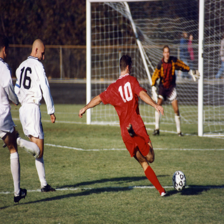

In [ ]:
import numpy as np
import PIL.Image as Image

input_image = tf.keras.utils.get_file('input_image.jpg','https://upload.wikimedia.org/wikipedia/commons/b/b9/Football_iu_1996.jpg')
input_image = Image.open(input_image).resize(IMAGE_SHAPE)
input_image

In [ ]:
input_image = np.array(input_image)/255.0
result = classifier.predict(input_image[np.newaxis, ...])

In [ ]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

806

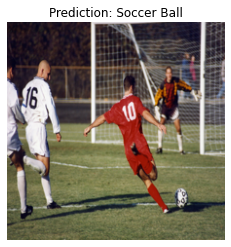

In [ ]:
plt.imshow(input_image)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())